<a href="https://colab.research.google.com/github/andidprastyo/ML-2023/blob/main/UTS/UTS_Clustering_Image_Segmentation_Soal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Gambar dengan Clustering

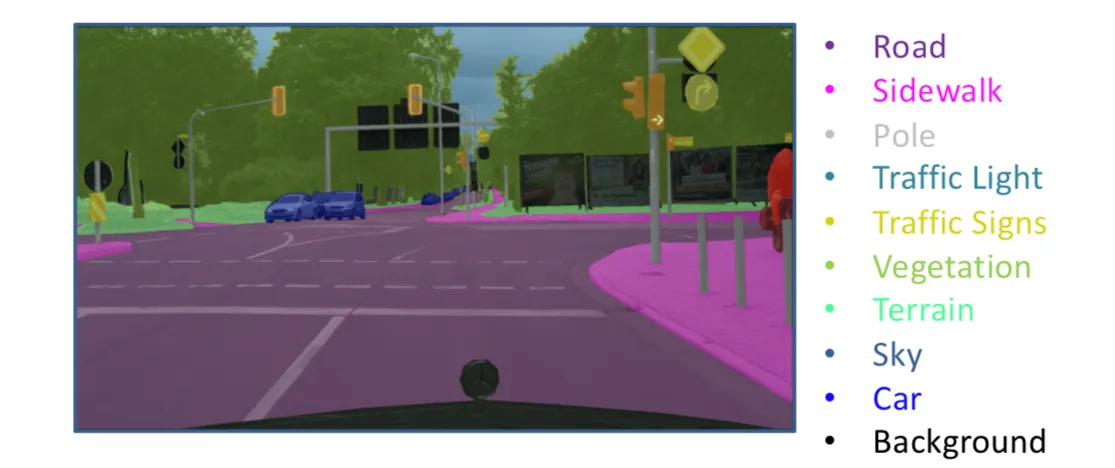

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

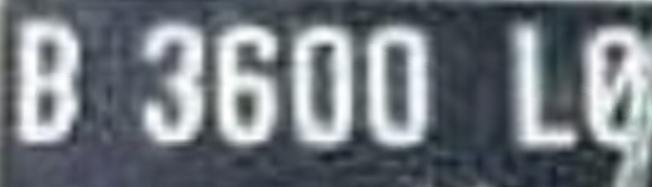

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

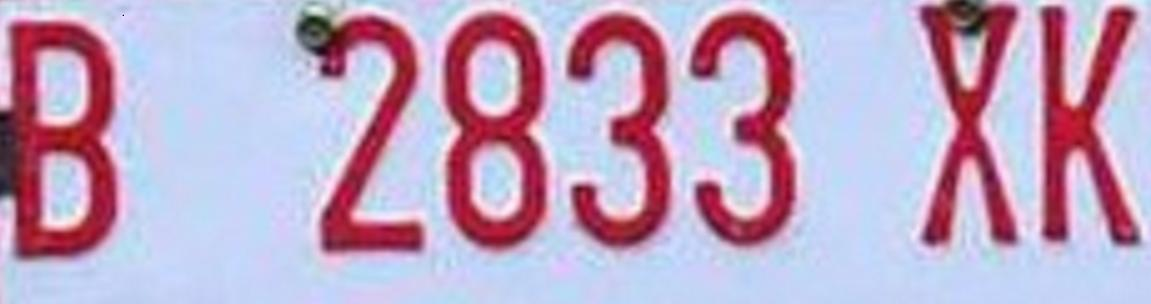

In [ ]:
# Load Gambar
img = cv2.imread('2.jpeg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

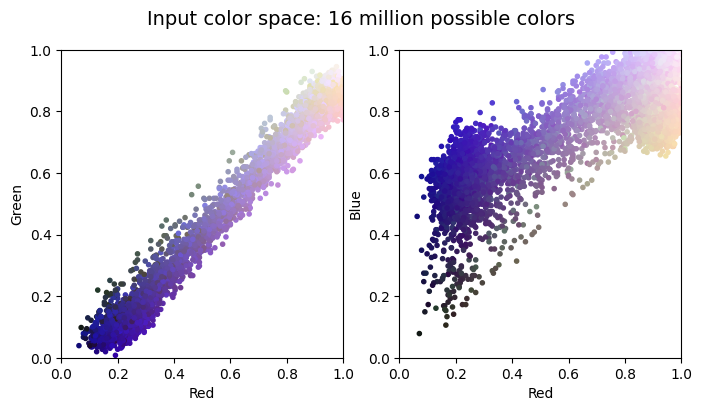

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# Contoh Hasil Yang Diharapkan

Text(0.5, 1.0, '2-color Image')

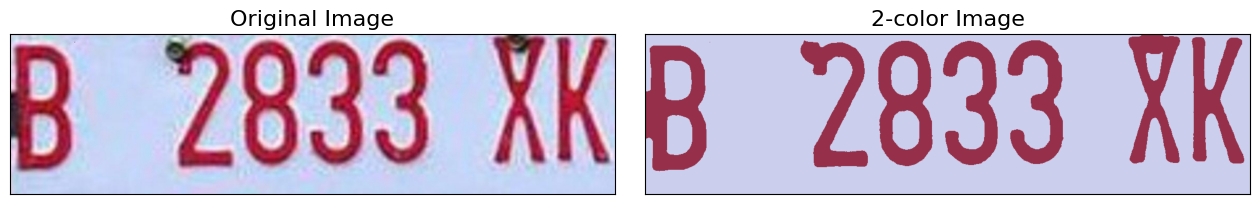

In [ ]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)